# Red Neuronal Convolucional en PyTorch

Implementación de una red neuronal artificial de arquitectura convolucional utilizando la interfaz de tensorflow y keras.
La aplicación utilizada para probar la implementación del modelo es la del reconocimiento de dígitos escritos a mano, MNIST.

Autor: M. en C. Mario Xavier Canche Uc, Agosto 2020, mario.canche@cimat.mx

Basado en: https://www.cimat.mx/~mrivera/cursos/aprendizaje_profundo/introduccion_convnets/introduccion_convnets.html

## Cargamos las librerias

In [10]:
# Importamos las librerias de PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms

import torch.nn.functional as F
import time

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

## Cargamos la base de datos MNIST

In [2]:
# Cargamos el dataset MNIST
root = '/Users/xaviercanche/Dropbox/Cimat2020/clases/Aprendizaje_Maquina_II/datasets'

#torch.manual_seed(123) #fijamos la semilla
trans = transforms.Compose([transforms.ToTensor()]) #Transformador para el dataset

train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans)

# preprocesamos los datos
batch_size   = 64
train_loader = torch.utils.data.DataLoader( dataset = train_set, batch_size = batch_size, shuffle = True  )
test_loader  = torch.utils.data.DataLoader( dataset = test_set , batch_size = batch_size, shuffle = False )

print ('Trainning batch number: {}'.format(len(train_loader)))
print ('Testing batch number: {}'.format(len(test_loader)))

Trainning batch number: 938
Testing batch number: 157


## Definimos la Arquitectura de la Red

In [3]:
# Arquitectura de la red
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3)

        self.fc1 = nn.Linear(64*3*3, 64) # capa oculta 
        self.fc2 = nn.Linear(64, 10) # capa de salida 
        
        self.loss_criterion = nn.CrossEntropyLoss() # Función de pérdida

    def forward(self, x, target):
        x = F.max_pool2d( F.relu(self.conv1(x)), 2)
        x = F.max_pool2d( F.relu(self.conv2(x)), 2)
        x = F.relu(self.conv3(x))
        x = x.view(-1, self.num_flat_features(x)) # flatten
        
        x = F.relu(self.fc1(x)) # Función de activación relu en la salida de la capa oculta
        x = F.softmax(self.fc2(x), dim=1) # Función de activación softmax en la salida de la capa de salida
        
        loss = self.loss_criterion(x, target) # Calculo de la función de pérdida 
        return x, loss
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [4]:
# Instanciamos el modelo y agregamos el optimizador
model = CNN()
optimizer = optim.RMSprop(model.parameters(), lr=0.001, momentum=0.0, alpha=0.9, eps=1e-07)
#optimizer = optim.SGD(model.parameters(), lr=0.001)

## Entrenamos el Modelo

In [5]:
# Funcion para Entrenar la red
def evaluate(model, dataset_loader, optimizer, train=False):
    
    correct_cnt = 0 # contador de aciertos
    ave_loss = 0 # acumulador de la función de pérdida
    count = 0 # contador de muestras
    
    for batch_idx, (x, target) in enumerate(dataset_loader):
        # sumamos el tamaño de batch, esto es porque n_batches*tamaño_batch != n_muestras
        count += len(x)
        
        if train:
            optimizer.zero_grad() # iniciamos a 0 los valores de los gradiente
            
        # Convertimos el tensor a variable del modulo autograd
        x = Variable(x)
        target = Variable(target)
        
        score, loss = model(x, target) # predecimos con el metodo forward
        _, pred_label = torch.max(score.data, 1) # pasamos de one hot a número
        correct_cnt += (pred_label == target.data).sum() # calculamos el número de etiquetas correctas
        ave_loss += loss.item() # sumamos el resultado de la función de pérdida para mostrar después
        
        if train:
            loss.backward() # calcula los gradientes y los propaga 
            optimizer.step() # adaptamos los pesos con los gradientes propagados
    
    accuracy = int(correct_cnt)/count # calculamos la precisión total
    ave_loss /= count # calculamos la pérdida media
    
    print ('==>>> loss: {:.6f}, accuracy: {:.4f}'.format(ave_loss, accuracy)) # mostramos resultados

In [6]:
# Entrenamos la Red
tic=time.time()
for epoch in range(10):
    print("Epoch: {}".format(epoch))
    print("Train")
    evaluate(model, train_loader, optimizer, train=True)
    print('Tiempo: {} secs'.format(time.time()-tic))

Epoch: 0
Train
==>>> loss: 0.025748, accuracy: 0.8173
Tiempo: 65.50862002372742 secs
Epoch: 1
Train
==>>> loss: 0.024671, accuracy: 0.8817
Tiempo: 134.94255089759827 secs
Epoch: 2
Train
==>>> loss: 0.023633, accuracy: 0.9495
Tiempo: 211.2279679775238 secs
Epoch: 3
Train
==>>> loss: 0.023102, accuracy: 0.9835
Tiempo: 287.0718777179718 secs
Epoch: 4
Train
==>>> loss: 0.023059, accuracy: 0.9863
Tiempo: 369.701180934906 secs
Epoch: 5
Train
==>>> loss: 0.023029, accuracy: 0.9883
Tiempo: 454.31698775291443 secs
Epoch: 6
Train
==>>> loss: 0.023011, accuracy: 0.9892
Tiempo: 533.1432900428772 secs
Epoch: 7
Train
==>>> loss: 0.023011, accuracy: 0.9894
Tiempo: 628.8329708576202 secs
Epoch: 8
Train
==>>> loss: 0.022987, accuracy: 0.9909
Tiempo: 728.9827208518982 secs
Epoch: 9
Train
==>>> loss: 0.022975, accuracy: 0.9916
Tiempo: 815.3720760345459 secs


In [7]:
print("Test")
evaluate(model, test_loader, optimizer, train=False)

Test
==>>> loss: 0.023077, accuracy: 0.9913


## Graficamos la matriz de confusión

In [8]:
# Extraemos las etiquetas predichas
test_true_labels = []
test_predicted_labels = []

for batch_idx, (x, target) in enumerate(test_loader):
            
    # Convertimos el tensor a variable del modulo autograd
    x = Variable(x)
    target = Variable(target)
        
    score, loss = model(x, target) # predecimos con el metodo forward
    _, pred_label = torch.max(score.data, 1) # pasamos de one hot a número
    
    test_true_labels += target.numpy().tolist()
    test_predicted_labels += pred_label.numpy().tolist()

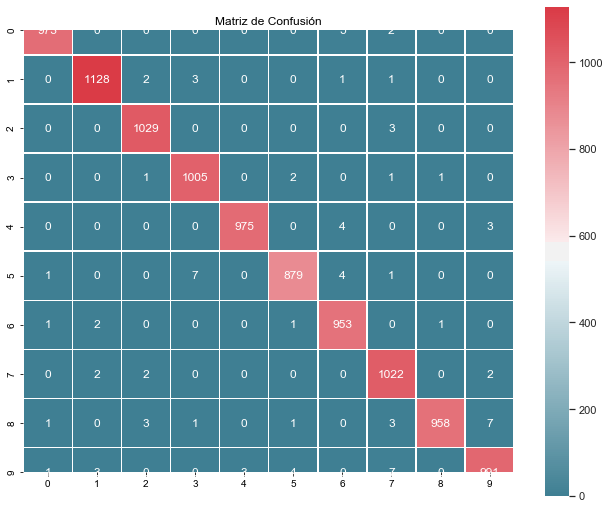

In [11]:
# Creamos la matriz de confusión
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()